No gemflag is provided, assuming the model includes biogem and ecogem
No gemflag is provided, assuming the model includes biogem and ecogem


/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packag

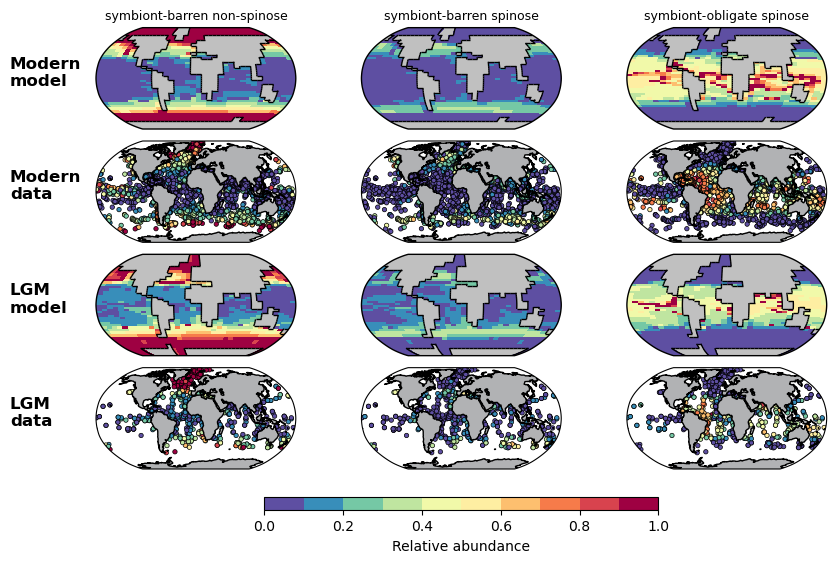

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.transforms as mtransforms

from cgeniepy.ecology import EcoModel
from cgeniepy.plot import scatter_map
from cgeniepy.array import GenieArray

def relative_abundance(model, foram):
    foram_biomass = model.get_foram(foram).isel(time=-1).array
    foram_biomass_total = model.get_foram(['bn','bs','sn','ss']).array.sum(dim=['variable']).isel(time=-1)
    ra = foram_biomass/foram_biomass_total
    ## return GenieArray
    genie_array = GenieArray()
    genie_array.array = ra    
    return genie_array

fig, axes = plt.subplots(nrows=4, ncols=3,
                         figsize=(9, 6),
                         subplot_kw=dict(projection=ccrs.Robinson()))

# OBSERVATION DATA
forcens = pd.read_csv("~/Science/lgm_foram_census/tidy/forcens_fg_r_tidy.csv")
lgm = pd.read_csv("~/Science/lgm_foram_census/tidy/lgm_fg_r_tidy.csv")

# MODELS
mod_pi = EcoModel("../model/muffin.CBE.worlg4.BASESFeTDTL.SPIN")
mod_lgm = EcoModel("../model/muffin.CBE.GIteiiva.BASESFeTDTL_rb.SPIN")

c = plt.get_cmap("Spectral_r", 10)

## letters = list(map(chr, range(97, 97+4))) #97 is "a"
letters = ['Modern\nmodel', 'Modern\ndata', 'LGM\nmodel', 'LGM\ndata']
name_list = ["bn", "bs", "ss"]
longname_list = ["symbiont-barren non-spinose",
                 "symbiont-barren spinose",
                 "symbiont-obligate spinose"]


for i, ax in enumerate(axes.flat):
    #labelling
    if i%3 == 0:
        trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
        ax.text(-0.5, 0.5, letters[i//3], transform=ax.transAxes + trans, weight="bold", fontsize=12)
    if i < 3:
        # plot modern model
        index = i
        relative_abundance(mod_pi, name_list[index]).plot(ax=ax, vmin=0, vmax=1, cmap=c, colorbar=False)
        ax.set_title(longname_list[i], fontsize=9)
    elif i < 6 :
        # forcens data
        index = i-3
        forcens_subset = forcens[['Latitude','Longitude',longname_list[index]]]
        scatter_map(df=forcens_subset, var=longname_list[index],ax=ax, vmin=0, vmax=1, cmap=c,s=10)
    elif i < 9:
        # plot modern model
        index = i - 6
        p = relative_abundance(mod_lgm, name_list[index]).plot(ax=ax, vmin=0,vmax=1, cmap=c, colorbar=False)
    elif i < 12:
        # margo data
        index = i-9
        lgm_subset = lgm[['Latitude','Longitude',longname_list[index]]]
        scatter_map(ax=ax, df=lgm_subset, var=longname_list[index], vmin=0, vmax=1, cmap=c,s=10,
                    interpolate=False)

fig.tight_layout()
cbar = fig.colorbar(p, ax=axes.flatten().tolist(),orientation="horizontal", pad=0.05, aspect=30, shrink=0.5)
cbar.set_label("Relative abundance")
cbar.set_label("Relative abundance")
#fig.savefig("../output/lgm_biogeographic_change.png", dpi=400, bbox_inches='tight')

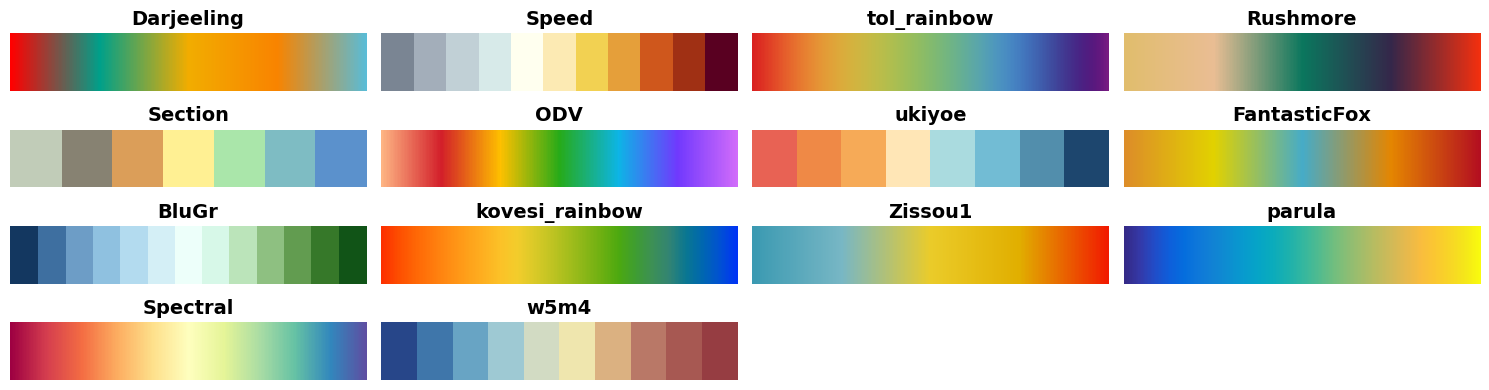

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from cgeniepy.plot import community_palette, avail_palette

# List of colormaps from cgeniepy
cmaps_list = avail_palette()

def plot_colormaps(cmaps):
    ncols = 4
    nrows = int(np.ceil(len(cmaps) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows))

    for i, cmap_name in enumerate(cmaps):
        row = i // ncols
        col = i % ncols
        ax = axes[row, col] if nrows > 1 else axes[col]

        # Create a gradient image using the colormap
        gradient = np.linspace(0, 1, 256).reshape(1, -1)
        ax.imshow(gradient, aspect='auto', cmap=community_palette(cmap_name))
        ax.set_title(cmap_name, fontsize=14, fontweight='bold')
        ax.axis('off')

    ## remove the unused axes
    for i in range(len(cmaps), ncols * nrows):
        row = i // ncols
        col = i % ncols
        fig.delaxes(axes[row, col])
        
    plt.tight_layout()
    plt.savefig('/Users/yingrui/Downloads/community_palette.png', dpi=300, bbox_inches='tight')
    
plot_colormaps(cmaps_list)